# **Analysis of US Real Estate Market: Home Costs & Income Across Regions**

## *A Comprhensive Study Incorporating Economic Indicators from the US Census*

### By Eric Lance Weber (6/5/2024)

## Introduction

   Over the years, the prevailing notion that 'home prices and income are not increasing at the same rate' has sparked concerns about the stability and accessibility of the housing market. This discrepancy, if true, could have far-reaching implications, particularly in the realm of housing affordability. As home prices surge, obtaining suitable financing becomes increasingly challenging for many individuals and families. 

   This analysis embarks on an exploration of the intricate relationship and evolving trends between housing prices and income across different geographic regions of the United States. By delving into the 'US Real Estate (Census Data),' which tracks the dynamic interplay between home cost and average income over time, we aim to uncover insights into the underlying dynamics of the US housing market. It is worth noting that this analysis will focus solely on data exploration, refraining from proposing solutions, and instead, shedding light on any notable patterns or trends observed within the dataset

## The Data

This data set was pulled from Kaggle, a well credited hub for downloading data sets across a wide variety of subjects.
This data was chosen based on relevancy, recency, and it's 'usability score' of 10: a score created by Kaggle that scores how well the data is, based on **Completeness**, **Credibility**, and **Compatibility**. Note: 10 is the highest score a data set can receive on Kaggle. If you wish to explore the data yourself, click the hyperlink below.

*US Real Estate (Census Data):* https://www.kaggle.com/datasets/joshhaber/us-real-estate-incomepriceregion-census-data?resource=download

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
real_estate_data = pd.read_csv('RealEstateUnitedStates.csv')
print('Years Covered: ', real_estate_data.Year.unique())
print('Months Covered: ', real_estate_data.Month.unique())
print('Reagions Covered:', real_estate_data.Region.unique())
print('Home Sizes Covered: ', real_estate_data['Home Size'].unique())
real_estate_data.head(20)

Years Covered:  [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Months Covered:  ['December' 'November' 'October' 'September' 'August' 'July' 'June' 'May'
 'April' 'March' 'February' 'January']
Reagions Covered: ['Midwest' 'Northeast' 'South' 'United States' 'West']
Home Sizes Covered:  ['Double' 'Single ' 'Total1']


,Year,Month,Region,Home Size,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars
0,2022,December,Midwest,Double,144300.0,28280.0,73070.0,73070.0,102400.0,102400.0
1,2022,December,Midwest,Single,82300.0,28280.0,73070.0,73070.0,102400.0,102400.0
2,2022,December,Midwest,Total1,104700.0,28280.0,73070.0,73070.0,102400.0,102400.0
3,2022,December,Northeast,Double,158300.0,22630.0,80360.0,80360.0,115300.0,115300.0
4,2022,December,Northeast,Single,75300.0,22630.0,80360.0,80360.0,115300.0,115300.0
5,2022,December,Northeast,Total1,113900.0,22630.0,80360.0,80360.0,115300.0,115300.0
6,2022,December,South,Double,155400.0,51080.0,68230.0,68230.0,98250.0,98250.0
7,2022,December,South,Single,80700.0,51080.0,68230.0,68230.0,98250.0,98250.0
8,2022,December,South,Total1,124000.0,51080.0,68230.0,68230.0,98250.0,98250.0
9,2022,December,United States,Double,155700.0,131400.0,74580.0,74580.0,106400.0,106400.0


## Data Breakdown

The columns contained within *real_estate_data* cover years **2014 - 2022**. It goes month-by-month for each of the **4** Regions including an additional data point for the entire U.S.:

1. West
2. Midwest
3. Northeast
4. South
5. United States

Within each of those regions, there is data collected for each of the **3** Home Sizes:

1. Double
2. Single
3. Total1

NOTE: While I initally believed Total1 to be the combined sum of Double and Single, it does not appear to be the case. For this data analysis, I will be only focusing on the data points that are clearly understood and thus only focusing on *Double* and *Single* households.

# Analysis Setup

### Creating Empty Dictionaries

In [52]:
df = pd.DataFrame(real_estate_data)

# Define a range of years from 2014 to 2022 (inclusive)
years = range(2014, 2023)

# Create empty dictionary for years
year_data = {}

# Create empty dictionaries to store 'Double' and 'Single' DataFrames for each year
double_data = {}
single_data = {}

# Create an empty dictionary to store the average prices
average_prices = {}

### Dictionary for Each Year

In [53]:
#Split up by Year

# Define a range of years from 2014 to 2022 (inclusive)
years = range(2014, 2023)

# Loop through each year
for year in years:
    # Filter DataFrame for the current year and store it in the dictionary
    year_data[year] = df[df['Year'] == year]

# Access the DataFrames for specific years if needed
#year_2014 = year_data[2014]
#year_2015 = year_data[2015]
# Similarly, access DataFrames for other years if needed

### Dictionaries for Single and Double Home Sizes Per Year

In [54]:
# Fill in Double and Single Dictionaries
for year in years:
    # Filter 'Double' and 'Single' DataFrames for the current year
    double_data[year] = df[(df['Year'] == year) & (df['Home Size'] == 'Double')]
    single_data[year] = df[(df['Year'] == year) & (df['Home Size'] == 'Single ')]

# Access the DataFrames for a specific year
#double_2014 = double_data[2014]
#single_2014 = single_data[2014]

### Dictionary for Avg Income Per Year

In [56]:
import pandas as pd
import numpy as np

# Assuming df is your original DataFrame containing the data
# Filter the DataFrame to select rows where 'Region' is equal to 'United States'
us_data = df[df['Region'] == 'United States'].copy()  # Create a copy to avoid SettingWithCopyWarning

# Convert the 'Year' column to datetime if it's not already in datetime format
us_data['Year'] = pd.to_datetime(us_data['Year'], format='%Y')

# Extract the year from the datetime object and convert it to int
us_data['Year'] = us_data['Year'].dt.year.astype(int)

# Group the filtered data by year and calculate the mean income for each year
mean_income_per_year = us_data.groupby('Year')['Mean Income - Current Dollars'].mean().to_dict()

# Display the updated dictionary
print(mean_income_per_year)


{2014: 75740.0, 2015: 79260.0, 2016: 83140.0, 2017: 86220.0, 2018: 90020.0, 2019: 98090.0, 2020: 97470.0, 2021: 102300.0, 2022: 106400.0}


### Dictionary for Each Region

In [57]:
# Define regions and home sizes
regions = ['Midwest', 'West', 'Northeast', 'South', 'United States']
home_sizes = ['Double', 'Single ']

# Create a dictionary to store the split data
split_data = {}

# Iterate over regions
for region in regions:
    region_data = df[df['Region'] == region]
    split_data[region] = {}
    
    # Iterate over home sizes
    for home_size in home_sizes:
        split_data[region][home_size] = region_data[region_data['Home Size'] == home_size]

# Access the split data if needed
midwest_double = split_data['Midwest']['Double']
midwest_single = split_data['Midwest']['Single ']

west_double = split_data['West']['Double']
west_single = split_data['West']['Single ']

northeast_double = split_data['Northeast']['Double']
northeast_single = split_data['Northeast']['Single ']

south_double = split_data['South']['Double']
south_single = split_data['South']['Single ']

us_double = split_data['United States']['Double']
us_single = split_data['United States']['Single ']

### Dictionary for Average Home Prices for Single and Double Home Sizes Per Year

In [58]:
# Fill in Avg House Prices Dictionary
for year in years:
    # Calculate average sales price for 'Double' homes in the given year
    avg_hpd_year_double = np.average(df[(df['Year'] == year) & (df['Home Size'] == 'Double')]['Average Sales Price'])
    # Calculate average sales price for 'Single' homes in the given year
    avg_hpd_year_single = np.average(df[(df['Year'] == year) & (df['Home Size'] == 'Single ')]['Average Sales Price'])
    
    # Store the results in the dictionary
    average_prices[year] = {'Double': avg_hpd_year_double, 'Single': avg_hpd_year_single}

### Average Housing Prices Per Region

In [63]:
#Split up the Data by Regions
midwest = df[df.Region == 'Midwest']
west = df[df.Region == 'West']
northeast = df[df.Region == 'Northeast']
south = df[df.Region == 'South']
us = df[df.Region == 'United States']


#Split those new data sets by Home Size (Double and Single)
midwest_double = midwest[midwest['Home Size'] == 'Double']
midwest_single = midwest[midwest['Home Size'] == 'Single ']

west_double = west[west['Home Size'] == 'Double']
west_single = west[west['Home Size'] == 'Single ']

northeast_double = northeast[northeast['Home Size'] == 'Double']
northeast_single = northeast[northeast['Home Size'] == 'Single ']

south_double = south[south['Home Size'] == 'Double']
south_single = south[south['Home Size'] == 'Single ']

us_double = us[us['Home Size'] == 'Double']
us_single = us[us['Home Size'] == 'Single ']


# Analysis

### What was the Average Price of Single and Double Houses Over Time?

In [64]:
# Print the results
for year in years:
    print(year, ' Average Housing Price: SINGLE: ', average_prices[year]['Single'])
    print(year, ' Average Housing Price: DOUBLE: ', average_prices[year]['Double'])
    print('---')

2014  Average Housing Price: SINGLE:  46288.333333333336
2014  Average Housing Price: DOUBLE:  83673.33333333333
---
2015  Average Housing Price: SINGLE:  46758.333333333336
2015  Average Housing Price: DOUBLE:  89293.33333333333
---
2016  Average Housing Price: SINGLE:  48576.666666666664
2016  Average Housing Price: DOUBLE:  92403.33333333333
---
2017  Average Housing Price: SINGLE:  49400.0
2017  Average Housing Price: DOUBLE:  95530.0
---
2018  Average Housing Price: SINGLE:  53881.666666666664
2018  Average Housing Price: DOUBLE:  101328.33333333333
---
2019  Average Housing Price: SINGLE:  53281.818181818184
2019  Average Housing Price: DOUBLE:  105254.54545454546
---
2020  Average Housing Price: SINGLE:  58061.818181818184
2020  Average Housing Price: DOUBLE:  109305.45454545454
---
2021  Average Housing Price: SINGLE:  73156.36363636363
2021  Average Housing Price: DOUBLE:  131952.72727272726
---
2022  Average Housing Price: SINGLE:  86448.33333333333
2022  Average Housing Pric

### This is straight to the point, but hard to compare! So let's graph it instead!

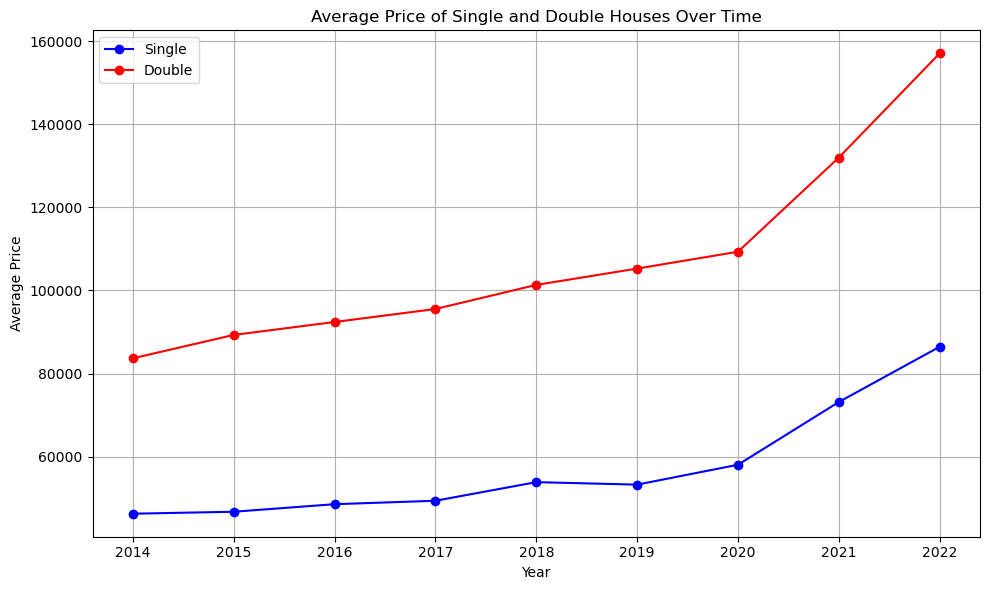

In [65]:

# Extract years and corresponding average single and double housing prices
years = list(average_prices.keys())
single_prices = [average_prices[year]['Single'] for year in years]
double_prices = [average_prices[year]['Double'] for year in years]

# Plot the line graph for single housing prices
plt.figure(figsize=(10, 6))
plt.plot(years, single_prices, marker='o', linestyle='-', color='b', label='Single')

# Plot the line graph for double housing prices
plt.plot(years, double_prices, marker='o', linestyle='-', color='r', label='Double')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price of Single and Double Houses Over Time')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


### Much better! We see that both Single and Double sized homes move very similarly to one and another. But now let's see where average income per year (across all the United States)

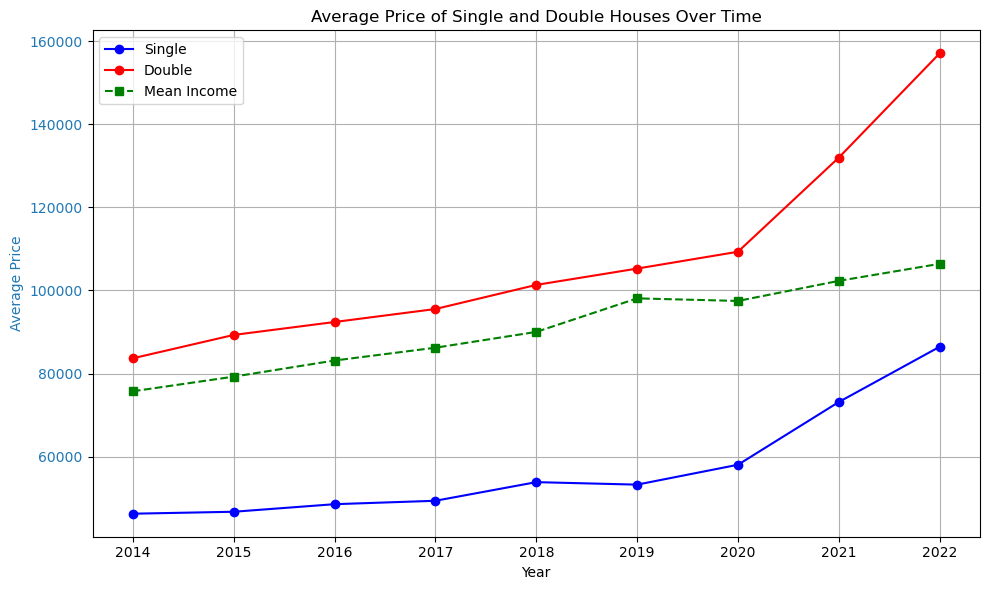

In [66]:
import matplotlib.pyplot as plt

# Assuming you have already defined the variables years, single_prices, double_prices, and mean_income_per_year_us

# Plot the line graph for single and double housing prices
fig, ax = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax.set_xlabel('Year')
ax.set_ylabel('Average Price', color=color)
ax.plot(years, single_prices, marker='o', linestyle='-', color='b', label='Single')
ax.plot(years, double_prices, marker='o', linestyle='-', color='r', label='Double')
ax.tick_params(axis='y', labelcolor=color)
ax.set_title('Average Price of Single and Double Houses Over Time')

# Plot mean income on the same y-axis
ax.plot(list(mean_income_per_year.keys()), list(mean_income_per_year.values()), marker='s', linestyle='--', color='g', label='Mean Income')

# Add legend
ax.legend()

# Show grid
ax.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
